In [155]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as pl
import theano.tensor as tt

In [102]:
az.style.use('arviz-colors')

In [2]:
%matplotlib inline

#### Wild samples

In [3]:
df_rrs = pd.read_csv('./Data/Samples_AENH_Rrs_std.csv')
df_rrs.head()

,Band,NH01,NH02,NH03,NH04,NH05,NH06,NH07,NH08,NH09,...,AE04,AE05,AE06,AE07,AE08,AE09,AE10,AE11,AE12,AE12b
0,420,3.154780,3.154736,3.116694,3.205821,3.066272,2.977655,2.941570,2.942745,2.939337,...,2.273455,2.644060,2.599485,2.770991,2.961895,2.974788,2.990487,2.986136,2.924927,2.927514
1,422,3.090127,3.095229,3.055232,3.133906,3.002973,2.914721,2.882190,2.888316,2.874250,...,2.283894,2.633229,2.591972,2.746430,2.917693,2.934065,2.950442,2.943259,2.887685,2.888546
2,424,3.030489,3.038939,2.999280,3.070679,2.944041,2.859214,2.828971,2.842152,2.818512,...,2.296935,2.626636,2.586679,2.722443,2.878622,2.900825,2.915785,2.909969,2.851839,2.854202
3,426,2.959646,2.969939,2.935357,2.995085,2.877310,2.795333,2.763943,2.785409,2.751960,...,2.298551,2.606282,2.574406,2.690319,2.832895,2.855669,2.868679,2.863986,2.807739,2.809320
4,428,2.885896,2.896618,2.869399,2.915435,2.809174,2.728797,2.696944,2.725076,2.683149,...,2.296087,2.581511,2.557927,2.656194,2.783705,2.804125,2.816138,2.811177,2.760222,2.759940


In [4]:
df_rrs.describe()

,Band,NH01,NH02,NH03,NH04,NH05,NH06,NH07,NH08,NH09,...,AE04,AE05,AE06,AE07,AE08,AE09,AE10,AE11,AE12,AE12b
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,512.000000,0.976666,0.960455,0.980801,0.961193,1.059213,1.140521,1.170119,1.108179,1.186187,...,1.257112,1.169882,1.199415,1.117746,1.043996,1.014115,1.009657,1.013910,1.056285,1.054831
std,53.981478,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,420.000000,-0.132953,-0.119039,-0.128906,-0.123318,-0.196839,-0.296903,-0.325628,-0.227973,-0.362485,...,-0.535288,-0.297260,-0.365155,-0.245767,-0.175246,-0.151498,-0.151632,-0.148716,-0.197813,-0.197959
25%,466.000000,0.109353,0.099063,0.108350,0.100802,0.155942,0.226347,0.255106,0.183760,0.278050,...,0.373675,0.240503,0.282488,0.193460,0.145919,0.126469,0.121785,0.124913,0.153951,0.153948
50%,512.000000,0.517258,0.478146,0.514426,0.486141,0.693623,0.906205,0.979630,0.802163,1.036951,...,1.288167,0.975214,1.070635,0.823118,0.646004,0.582089,0.573644,0.575794,0.678053,0.678508
75%,558.000000,1.792230,1.771291,1.813110,1.768682,1.965930,2.067395,2.101856,2.053018,2.116873,...,2.277968,2.176201,2.184830,2.096036,1.945810,1.897722,1.883971,1.896745,1.969642,1.970814
max,604.000000,3.154780,3.154736,3.116694,3.205821,3.066272,2.977655,2.941570,2.942745,2.939337,...,2.304876,2.644060,2.599485,2.770991,2.961895,2.974788,2.990487,2.986136,2.924927,2.927514


In [5]:
df_is = pd.read_csv('./Data/AENH_insitu_measurements.csv')
df_is.head()

,St_Ivona,Chl.a..ug.L.,Pro.biomass..umol.C.L.2,Syn.biomass..umol.C.L.2,Peuk.biomass..umol.C.L.,Neuk.biomass..umol.C.L.
0,NH01,0.14,0.39,0.01,0.13,0.04
1,NH03,0.09,0.30,0.01,0.09,0.02
2,NH04,0.10,0.37,0.02,0.11,0.04
3,NH05,0.22,0.51,0.10,0.39,0.09
4,NH06,0.25,0.62,0.12,0.81,0.06


#### Single species spectral response mean and standard deviation

In [6]:
df_stats = pd.read_csv('./Data/Reference_sp_Rrs_AMT_stats_std.csv')
df_stats.set_index('Band', inplace=True)
df_stats.head()

,mPeuk,mPro_border,mPro_gyre,mSyn,sdPeuk,sdPro_border,sdPro_gyre,sdSyn
Band,,,,,,,,
420,1.500850,1.617572,1.980188,1.441588,0.229774,0.051435,0.067358,0.039750
422,1.485130,1.617656,1.959411,1.413814,0.185170,0.043093,0.066532,0.025162
424,1.454370,1.599990,1.918321,1.396227,0.173584,0.038181,0.062649,0.003483
426,1.399284,1.582252,1.875811,1.374741,0.155619,0.037169,0.060243,0.004756
428,1.361316,1.570379,1.841327,1.347966,0.146860,0.034956,0.056601,0.013572


In [7]:
# Numbers of replicates for the table above
Replicates = dict(mPeuk=3, mPro_border=3, mPro_gyre=4, mSyn=2)

#### Simulate mixed response assuming linear combination as below:

$$Rrs_{bulk} =\alpha_{mPeuk} * Rrs_{mPeuk}+ \alpha_{mPro_{border}} * Rrs_{mPro_{border}} + \alpha_{mPro_{gyre}} * Rrs_{mPro_{gyre}} + \alpha_{mSyn} * Rrs_{mSyn}$$
    

In [8]:
# mixture data
df_synth_mix = pd.read_csv('./Data/Samples_synthetic_mix_perc.csv')
df_synth_mix.head()

,Spp,sample1,sample2,sample3,sample4,sample5
0,Pro_b,0.05,0.10,0.17,0.58,0.37
1,Pro_g,0.07,0.24,0.37,0.18,0.57
2,Syn,0.56,0.39,0.10,0.06,0.02
3,Peuk,0.32,0.27,0.36,0.18,0.04


In [9]:
# response data
df_synth_rrs = pd.read_csv('./Data/Samples_synthetic_mix_Rrs.csv')
df_synth_rrs.set_index('Band', inplace=True)
df_synth_rrs.head()

,sample1,sample2,sample3,sample4,sample5
Band,,,,,
420,1.507053,1.604451,1.692121,1.651273,1.816074
422,1.485019,1.584396,1.676012,1.643087,1.803078
424,1.461568,1.557605,1.644973,1.618852,1.771539
426,1.428045,1.522375,1.604249,1.589708,1.738112
428,1.397894,1.492218,1.573126,1.568174,1.712008


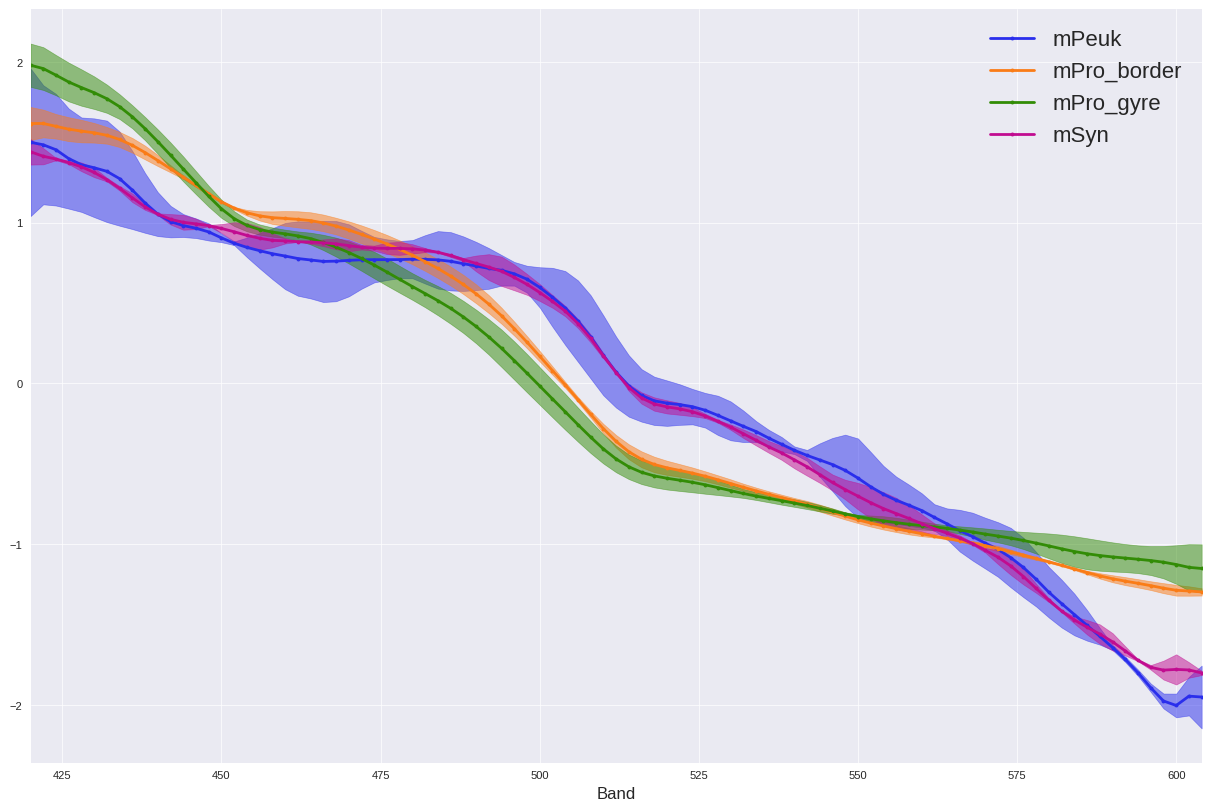

In [103]:
colors = ['C0','C1','C2', 'C3']
critters = ['Peuk', 'Pro_border', 'Pro_gyre', 'Syn']
f, ax = pl.subplots(figsize=(12, 8), constrained_layout=True)
for col, crit in zip(colors, critters):
    df_stats.plot(y=f'm{crit}', color=col, marker='.', ax=ax)
    ax.fill_between(df_stats.index,
                    df_stats[f'm{crit}'] + 2 * df_stats[f'sd{crit}'],
                    df_stats[f'm{crit}'] - 2 * df_stats[f'sd{crit}'],
                   color=col, alpha=0.5)
ax.legend(fontsize=16);

In [104]:
y_ = df_synth_rrs.loc[:, 'sample1':].values

In [12]:
X = df_stats.loc[:, 'mPeuk': 'mSyn']

In [105]:
X.head()

,mPeuk,mPro_border,mPro_gyre,mSyn
Band,,,,
420,1.500850,1.617572,1.980188,1.441588
422,1.485130,1.617656,1.959411,1.413814
424,1.454370,1.599990,1.918321,1.396227
426,1.399284,1.582252,1.875811,1.374741
428,1.361316,1.570379,1.841327,1.347966


In [25]:
X_ = X.values
critters = ['Peuk', 'Pro_border', 'Pro_gyre', 'Syn']

In [111]:
with pm.Model() as m_simple1:
    α = pm.Dirichlet('α', np.ones(4) )
    μ = pm.math.dot(X_, α)
    σ = pm.Exponential('σ', 1)
    likelihood = pm.Normal('likelihood', mu=μ, sd=σ, observed=y_[:, 0])

In [17]:
render = pm.model_to_graphviz(m_simple)
render.format = 'png'
render.render('simple_model', directory='./')

'./simple_model.png'

<img src='./simple_model.png'>

In [112]:
with m_simple:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:04<00:00, 921.61draws/s] 
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.16247302577385592, but should be close to 0.8. Try to increase the number of tuning steps.
There were 275 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07549951507245363, but should be close to 0.8. Try to increase the number of tuning steps.
There were 196 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.11016979472106075, but should be close to 0.8. Try to increase the number of tuning steps.
There were 472 divergences after tuning. Increase `target_accept` or reparamete

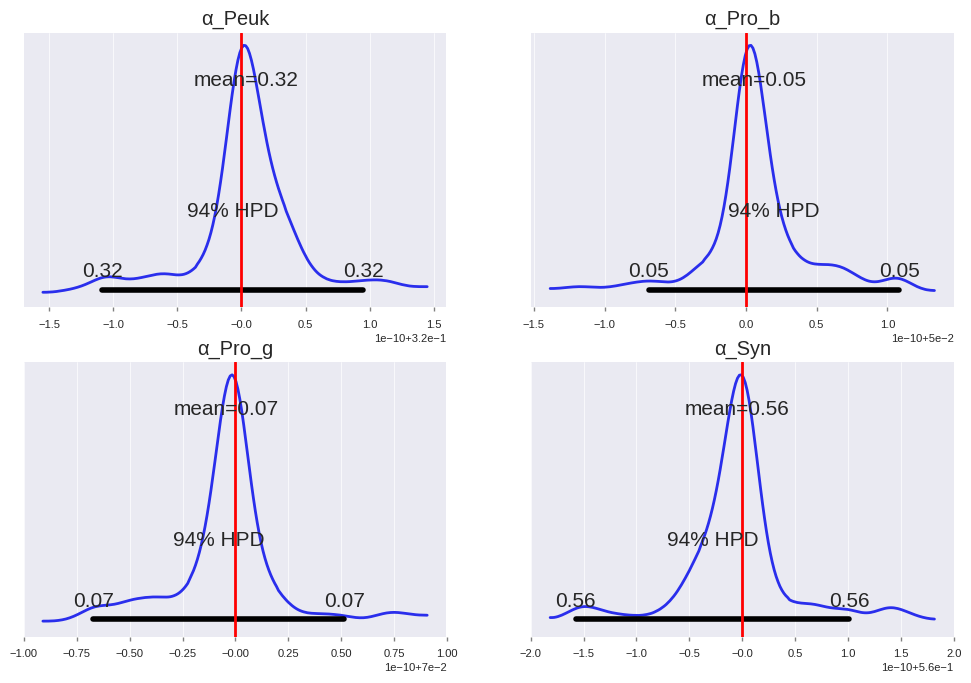

In [116]:
f, axs = pl.subplots(2, 2, figsize=(12, 8))
axs = pm.plot_posterior(trace, var_names=['α'], ax=axs, round_to=2,)
for ax, crit in zip(axs.flatten(), crit_ref_order):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_synth_mix.loc[crit, 'sample1'], color='r')

In [46]:
df_synth_mix

,sample1,sample2,sample3,sample4,sample5
Spp,,,,,
Pro_b,0.05,0.10,0.17,0.58,0.37
Pro_g,0.07,0.24,0.37,0.18,0.57
Syn,0.56,0.39,0.10,0.06,0.02
Peuk,0.32,0.27,0.36,0.18,0.04


In [40]:
df_synth_mix.set_index('Spp', inplace=True)

### Sample2

In [33]:
with pm.Model() as m_simple2:
    α = pm.Dirichlet('α', np.ones(4) )
    μ = pm.math.dot(X_, α)
    σ = pm.Exponential('σ', 1)
    likelihood = pm.Normal('likelihood', mu=μ, sd=σ, observed=y_[:, 1])

In [39]:
df_synth_mix

,Spp,sample1,sample2,sample3,sample4,sample5
0,Pro_b,0.05,0.10,0.17,0.58,0.37
1,Pro_g,0.07,0.24,0.37,0.18,0.57
2,Syn,0.56,0.39,0.10,0.06,0.02
3,Peuk,0.32,0.27,0.36,0.18,0.04


In [36]:
with m_simple2:
    trace_m2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1112.14draws/s]
There were 127 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1521068396709929, but should be close to 0.8. Try to increase the number of tuning steps.
There were 267 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07617676430524915, but should be close to 0.8. Try to increase the number of tuning steps.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.16104822115092401, but should be close to 0.8. Try to increase the number of tuning steps.
There were 188 divergences after tuning. Increase `target_accept` or reparameter

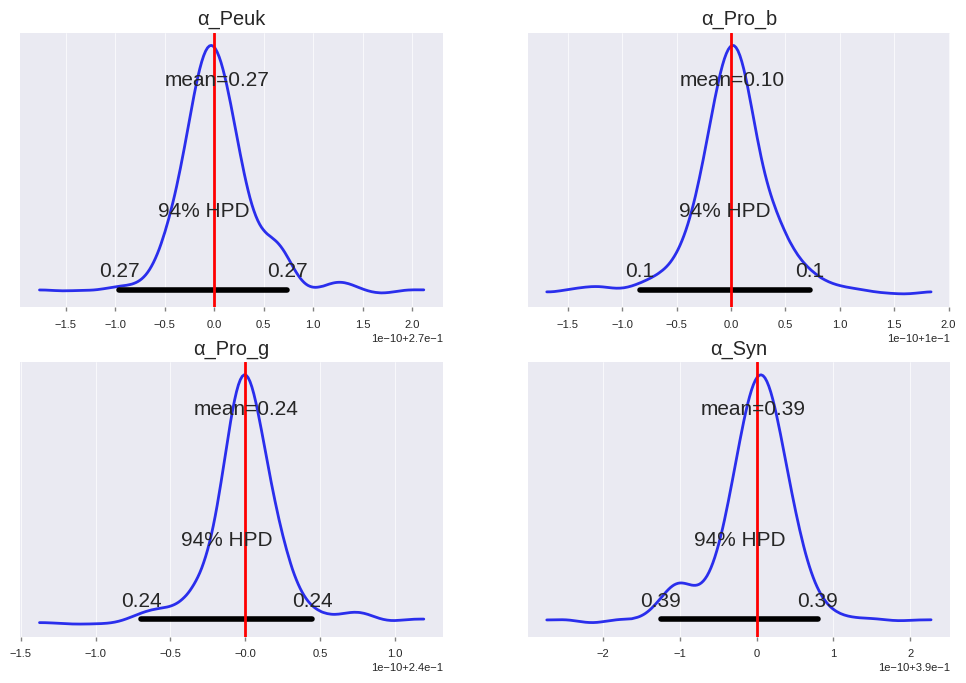

In [117]:
f, axs = pl.subplots(2, 2, figsize=(12, 8))
axs = pm.plot_posterior(trace_m2, var_names=['α'], ax=axs, round_to=2,)
for ax, crit in zip(axs.flatten(), crit_ref_order):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_synth_mix.loc[crit, 'sample2'], color='r')

In [52]:
df_synth_mix

,sample1,sample2,sample3,sample4,sample5
Spp,,,,,
Pro_b,0.05,0.10,0.17,0.58,0.37
Pro_g,0.07,0.24,0.37,0.18,0.57
Syn,0.56,0.39,0.10,0.06,0.02
Peuk,0.32,0.27,0.36,0.18,0.04


### Sample 3

In [82]:
with pm.Model() as m_simple3:
    α = pm.Dirichlet('α', np.ones(4) )
    μ = pm.math.dot(X_[::20], α)
    σ = pm.Exponential('σ', 1)
    likelihood = pm.Normal('likelihood', mu=μ, sd=σ, observed=y_[::20, 2])
    trace_m3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:04<00:00, 836.37draws/s] 
There were 432 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.002714028065503595, but should be close to 0.8. Try to increase the number of tuning steps.
There were 394 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0022008112586652064, but should be close to 0.8. Try to increase the number of tuning steps.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6327993870785548, but should be close to 0.8. Try to increase the number of tuning 

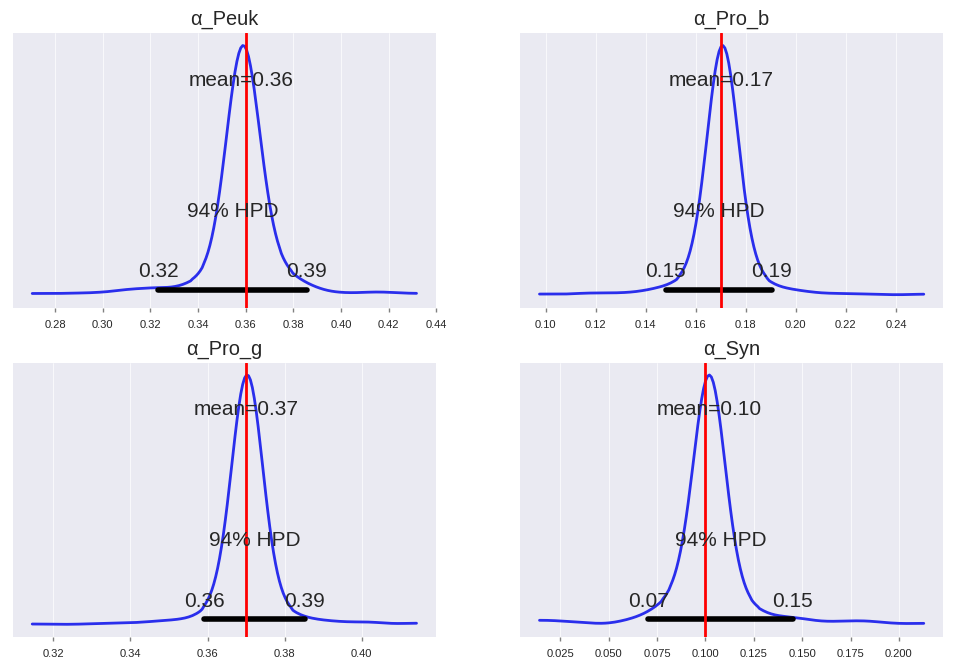

In [118]:
f, axs = pl.subplots(2, 2, figsize=(12, 8))
axs = pm.plot_posterior(trace_m3, var_names=['α'], ax=axs, round_to=2,)
for ax, crit in zip(axs.flatten(), crit_ref_order):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_synth_mix.loc[crit, 'sample3'], color='r')

In [52]:
df_synth_mix

,sample1,sample2,sample3,sample4,sample5
Spp,,,,,
Pro_b,0.05,0.10,0.17,0.58,0.37
Pro_g,0.07,0.24,0.37,0.18,0.57
Syn,0.56,0.39,0.10,0.06,0.02
Peuk,0.32,0.27,0.36,0.18,0.04


In [ ]:
pm.NormalMixture()

### Sample 4

In [53]:
with pm.Model() as m_simple4:
    α = pm.Dirichlet('α', np.ones(4) )
    μ = pm.math.dot(X_, α)
    σ = pm.Exponential('σ', 1)
    likelihood = pm.Normal('likelihood', mu=μ, sd=σ, observed=y_[:, 3])
    trace_m4 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:04<00:00, 829.67draws/s] 
There were 213 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.09148338062691003, but should be close to 0.8. Try to increase the number of tuning steps.
There were 277 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.027928428847778086, but should be close to 0.8. Try to increase the number of tuning steps.
There were 164 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1448264945655795, but should be close to 0.8. Try to increase the number of tuning steps.
There were 78 divergences after tuning. Increase `target_accept` or reparamete

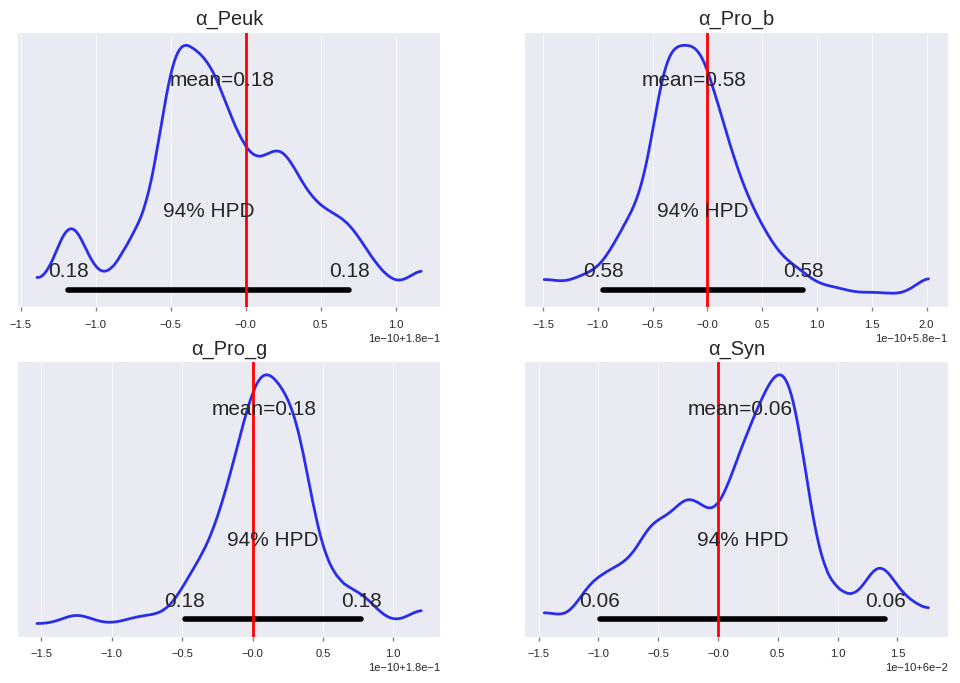

In [119]:
f, axs = pl.subplots(2, 2, figsize=(12, 8))
axs = pm.plot_posterior(trace_m4, var_names=['α'], ax=axs, round_to=2,)
for ax, crit in zip(axs.flatten(), crit_ref_order):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_synth_mix.loc[crit, 'sample4'], color='r')

In [55]:
df_synth_mix

,sample1,sample2,sample3,sample4,sample5
Spp,,,,,
Pro_b,0.05,0.10,0.17,0.58,0.37
Pro_g,0.07,0.24,0.37,0.18,0.57
Syn,0.56,0.39,0.10,0.06,0.02
Peuk,0.32,0.27,0.36,0.18,0.04


### ---%<-----------------------------------------------------

### Sample 5

In [270]:
with pm.Model() as m_simple5:
    α = pm.Dirichlet('α', np.ones(4), testval=np.ones(4)/4)
    #prop = pm.Categorical('prop', p=α, shape=4)
    μ = pm.math.dot(X_, α)
    σ = pm.HalfNormal('σ', 5)
    likelihood = pm.Normal('likelihood', mu=μ, sd=σ, observed=y_[:, 4], )
    trace_m5 = pm.sample(1000, init='advi', n_init=50000,  tune=1000,
                         target_accept=0.95, max_treedepth=11)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = -300.77:  51%|█████     | 25299/50000 [00:10<00:10, 2439.13it/s] 
Convergence achieved at 25300
Interrupted at 25,299 [50%]: Average Loss = -84.987
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 8000/8000 [02:43<00:00,  7.10draws/s] 
There were 127 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4936034074325589, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.849947149521466, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 91 divergences after tunin

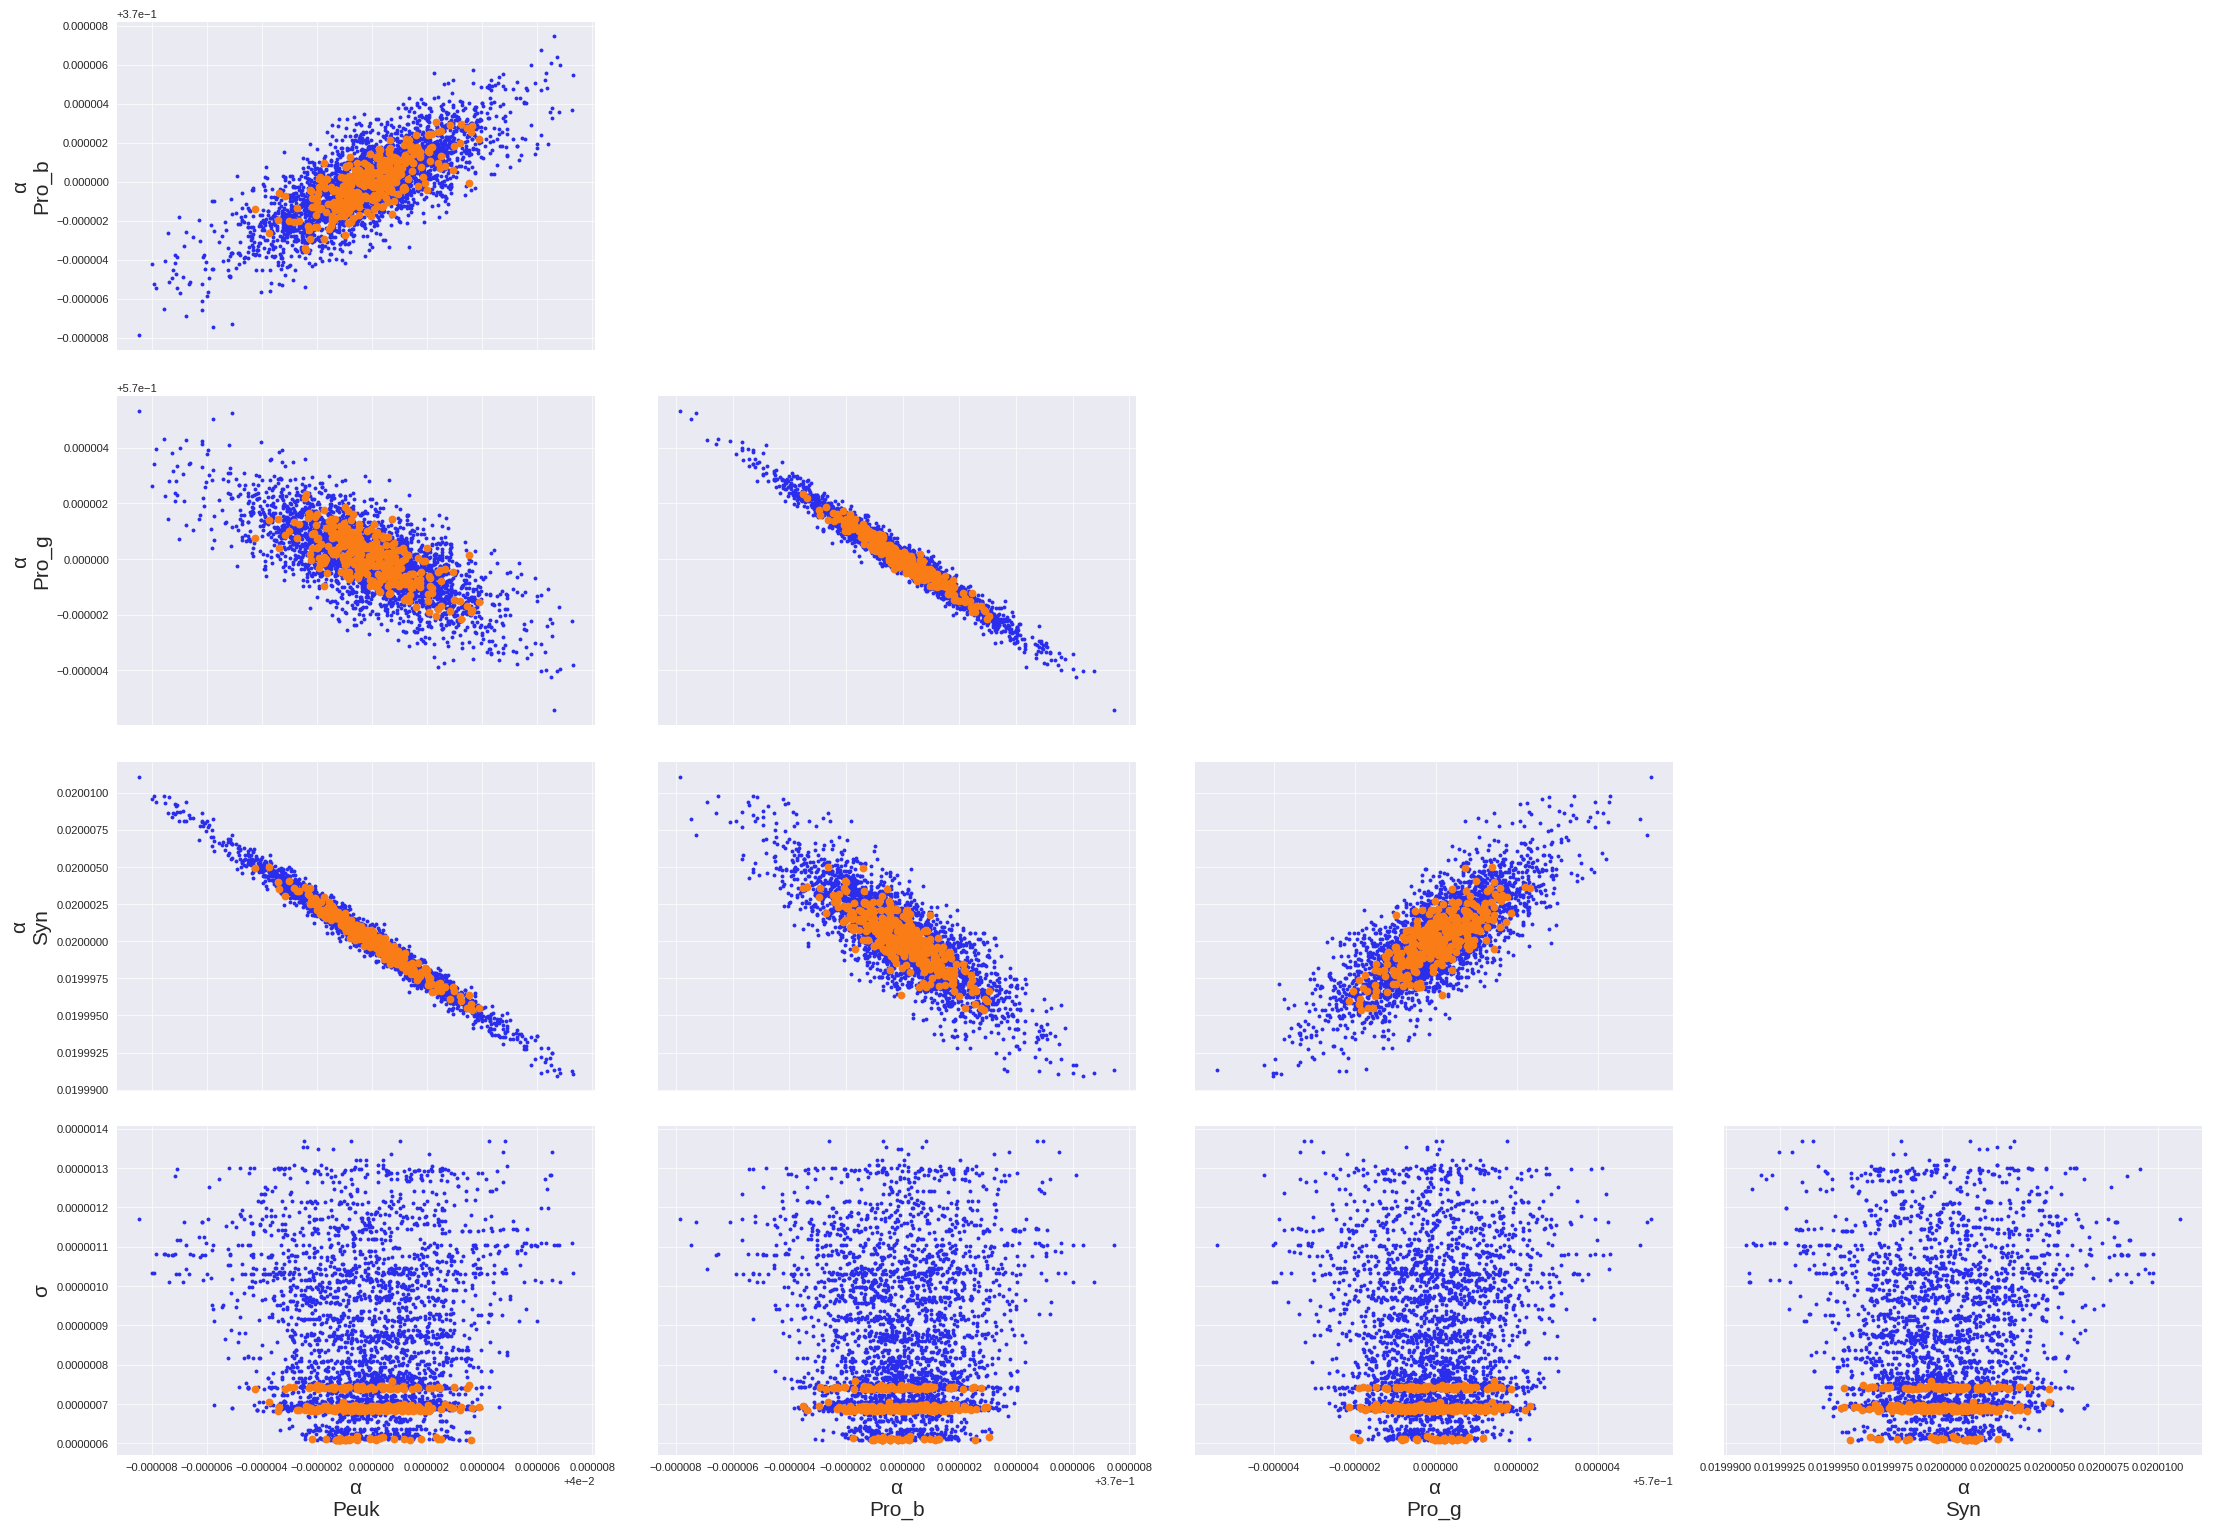

In [268]:
results_m5 = az.from_pymc3(trace=trace_m5, coords =coords,
                          dims={'α': ['Spp']})
coords = {'Spp': crit_ref_order}
az.plot_pair(results_m5, var_names = ['α', 'σ'], coords=coords,
            divergences=True,);

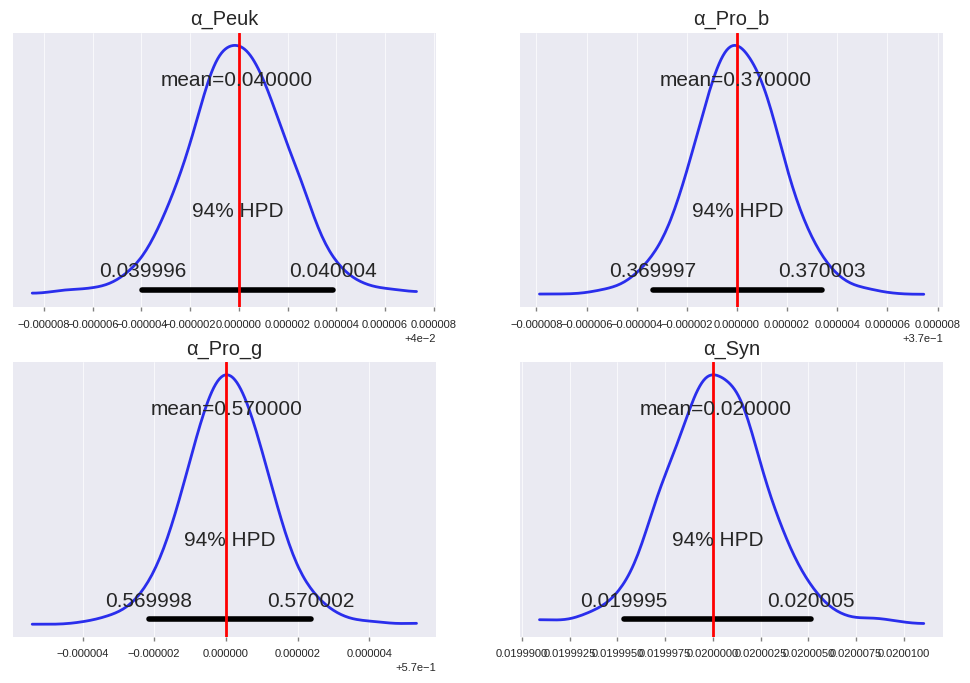

In [269]:
f, axs = pl.subplots(2, 2, figsize=(12, 8))
axs = pm.plot_posterior(trace_m5, var_names=['α'], ax=axs, round_to=6,)
for ax, crit in zip(axs.flatten(), crit_ref_order):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_synth_mix.loc[crit, 'sample5'], color='r')